# Chapter 2: Multivariables Optimization
This notebook serves as a way to familiarize myself with the essential functions employed during math modeling.
This is for Chapter 2 of Meerschaert

In [7]:
import math
import numpy as np
from scipy.optimize import minimize
from sympy import symbols, diff, Eq, solve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2.1 Optimization without constraints
## Example 2.1 The color TV sets problem
A manufacturer of color TV sets is planning the introduction of two new products, a 19–inch LCD flat panel set with a manufacturer’s suggested retail price (MSRP) of $339 and a 21–inch LCD flat panel set with an MSRP of $399. The cost to the company is $195 per 19–inch set and $225 per 21–inch set, plus an additional $400,000 in fixed costs. In the competitive market in which these sets will be sold, the number of sales per year will affect the average selling price. It is estimated that for each type of set, the average selling price drops by one cent for each additional unit sold. Furthermore, sales of the 19– inch set will affect sales of the 21–inch set, and vice–versa. It is estimated that the average selling price for the 19–inch set will be reduced by an additional 0.3 cents for each 21–inch set sold, and the price for the 21–inch set will decrease by 0.4 cents for each 19–inch set sold. How many units of each type of set should be manufactured?


In this problem, we will approach using the multivariable optimization problem without constraints method. Recall from Calc 3, and the following parts will also use Calc 3 knowledge.

We are given a function $y = f(x_1, ..., x_n)$ on a subset $S$ of the $n$–dimensional space $\mathbb{R}^n$. We wish to find the maximum and/or minimum values of $f$ on the set $S$. There is a theorem that states that if $f$ attains its maximum or minimum at an interior point $(x_1, . . . , x_n)$ in $S$, then $\nabla f = 0$ at that point, assuming that $f$ is differentiable at that point. In other words, at the extreme point
$$\frac{∂f}{∂x_1} (x_1, ..., x_n) = 0 $$
$$\frac{∂f}{\delta x_n} (x_1,...,x_n)=0$$
The theorem allows us to rule out as a candidate for max–min any point in the interior of $S$ for which any of the partial derivatives of $f$ do not equal zero. Thus, to find the max–min points we must solve simultaneously the n equations in n unknowns defined by Equation above. Then we must also check any points on the boundary of $S$, as well as any points where one or more of the partial derivatives is undefined.

Now we declare the variables used for modeling:

#### Variables:
s = number of 19–inch sets sold (per year) 

t = number of 21–inch sets sold (per year) 

p = selling price for a 19–inch set ($)

q = selling price for a 21–inch set ($)

C = cost of manufacturing sets ($/year) 

R = revenue from the sale of sets ($/year) 

P = profit from the sale of sets ($/year)

#### Assumptions:
p = 339 − 0.01s − 0.003t

q = 399 − 0.004s − 0.01t

R = ps + qt

C =400,000+195s+225t P=R−C

s≥0 t≥0

#### Objective:
Maximize P

In [8]:
# variable declaration
s, t, p, q = symbols('s t p q')
p = 339 - 0.01 * s - 0.003 * t
q = 399 - 0.004 * s - 0.01 * t
R = p * s + q * t
C = 400000 + 195 * s + 225 * t
P = R - C
print("P = ", P)

P =  s*(-0.01*s - 0.003*t + 339) - 195*s + t*(-0.004*s - 0.01*t + 399) - 225*t - 400000


We let $y = P$ to be the goal variable of finding the maximum, $x_1 =s,x_2=t$ to be the deciding variables, the problem now becomes finding the maximum of $y = f(x_1,x_2) = x_1(-0.01x_1 - 0.003x_2 + 339)  + x_2(-0.004x_1 - 0.01x_2 + 399) - (195x_1 + 225x_2 + 400000)$ on the support $S = \{(x_1,x_2):\:x_1 \geq 0, x_2 \geq 0\}$. Figure 2.1 suggests that $f$ achieves maximum inside $S$, and Figure 2.2, the contour plot telss us that $f$ is a parabaloid with maximum at the only solutions letting $\nabla f = 0$. We can see from figure 2.2 that the maximum of $f$ is near $x_1= 5000, x_2 = 7000$.   

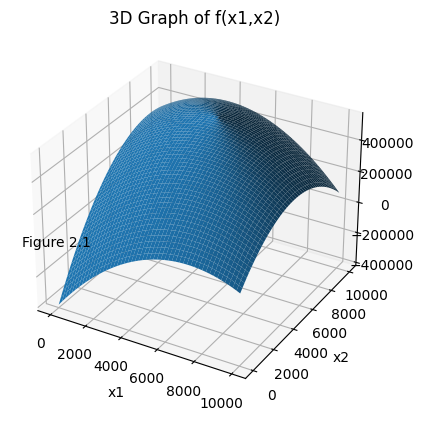

In [23]:
# multivariable function
def function(x1, x2):
    return x1 * (-0.01 * x1 - 0.003 * x2 + 339)  + x2 * (-0.004 * x1 - 0.01 * x2 + 399) - (195 * x1 + 225 * x2 + 400000)
x1_val = np.linspace(0, 10000, 1000)
x2_val = np.linspace(0, 10000, 1000)

# create a meshgrid
X1, X2 = np.meshgrid(x1_val, x2_val)

Y = function(X1, X2)

# plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Y)

# Set labels
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Figure 2.1: 3D Graph of f(x1,x2)')
# ax.text(0, 0, 0, "Figure 2.1", ha='center', va='center', color='black', fontsize=10)

plt.show()


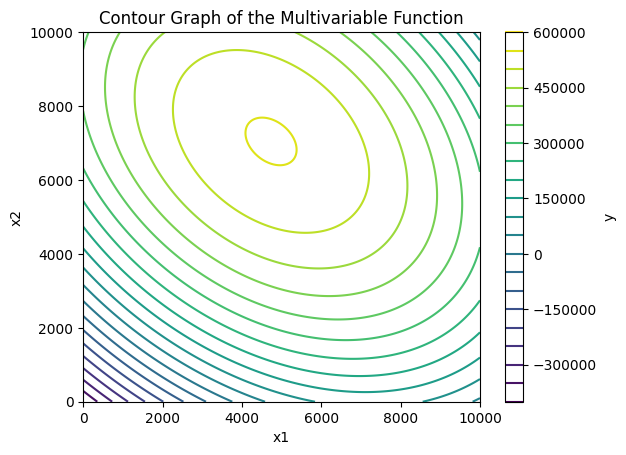

In [25]:
# plot the contour graph of f(x1, x2), note that necessary variables are defined above
# Plot the contour graph
plt.contour(X1, X2, Y, levels=20, cmap='viridis')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(' Figure 2.2: Contour Graph of f(x1,x2)')
plt.colorbar(label='y')

# Show the plot
plt.show()


In [26]:
# variable declaration
x1, x2, lambda_, c = symbols('x1 x2 lambda c', real=True)

# declare the multivariable function
y = (339 - x1/100 - 3 * x2 / 1000) * x1 + (399 - 4 * x1 / 1000 - x2 / 100) * x2 - (400000 + 195 * x1 + 225 * x2)

# calculating the partial derivatives
dy_dx1 = diff(y, x1)
dy_dx2 = diff(y, x2)

print("dy_dx1: ", dy_dx1)
print("dy_dx2: ", dy_dx2)

# solve dy_dx1 = lambda, dy_dx2 = lambda, x1+x2 = c, x1,x2,x3
eq1 = Eq(dy_dx1, lambda_)
eq2 = Eq(dy_dx2, lambda_)
eq3 = Eq(x1 + x2, c)

# Solve the system of equations
solution = solve((eq1, eq2, eq3), (x1, x2, lambda_))
sol_x1 = solution[x1]
sol_x2 = solution[x2]
sol_lambda = solution[lambda_]

# Print the solution
print(solution)

y_with_sol = y.subs({x1: sol_x1, x2: sol_x2, lambda_: sol_lambda})

dy_with_sol_dc = diff(y_with_sol, c)
print("y: ", y_with_sol)
# c = 10000
print("dy_dc: ", dy_with_sol_dc)
print("dy_dc: ", dy_with_sol_dc.subs({c: 10000}))

# Substitute the solutions into dy_with_sol_dc and y
dy_dc_value = dy_with_sol_dc.subs({x1: sol_x1, x2: sol_x2, lambda_: sol_lambda})
y_value = y_with_sol.subs({x1: sol_x1, x2: sol_x2, lambda_: sol_lambda})

# Substitute c=10000 into the expression
result = dy_dc_value * (10000) / y_value

# Print the result
print("Result when c=10000:", result.subs({c:10000}))


dy_dx1:  -x1/50 - 7*x2/1000 + 144
dy_dx2:  -7*x1/1000 - x2/50 + 174
{lambda: 159 - 27*c/2000, x1: c/2 - 15000/13, x2: c/2 + 15000/13}
y:  -210*c + (4512/13 - 13*c/2000)*(c/2 - 15000/13) + (5097/13 - 7*c/1000)*(c/2 + 15000/13) - 5650000/13
dy_dc:  159 - 27*c/2000
dy_dc:  24
Result when c=10000: 78/173
